In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("E:/Official purpose/Sprint - 19/Bangladesh-Rainfall-master/historical-rainfall-data-in-bangladesh/customized_daily_rainfall_data.csv")
df.head(10)

,StationIndex,Station,Year,Month,Day,Rainfall
0,1,Dhaka,1970,1,1,0
1,1,Dhaka,1970,1,2,0
2,1,Dhaka,1970,1,3,0
3,1,Dhaka,1970,1,4,0
4,1,Dhaka,1970,1,5,0
5,1,Dhaka,1970,1,6,0
6,1,Dhaka,1970,1,7,0
7,1,Dhaka,1970,1,8,0
8,1,Dhaka,1970,1,9,0
9,1,Dhaka,1970,1,10,0


In [3]:
df.drop(df[(df['Day']>28) & (df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Day']>29) & (df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[(df['Day']>30) & ((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [4]:
date = [str(y)+'-'+str(m)+'-'+str(d) for y, m, d in zip(df.Year, df.Month, df.Day)]

In [5]:
df.index = pd.to_datetime(date)

In [6]:
df['date'] = df.index
df['dayofyear']=df['date'].dt.dayofyear
df.drop('date',axis=1,inplace=True)

In [7]:
df.head()

,StationIndex,Station,Year,Month,Day,Rainfall,dayofyear
1970-01-01,1,Dhaka,1970,1,1,0,1
1970-01-02,1,Dhaka,1970,1,2,0,2
1970-01-03,1,Dhaka,1970,1,3,0,3
1970-01-04,1,Dhaka,1970,1,4,0,4
1970-01-05,1,Dhaka,1970,1,5,0,5


In [8]:
df.size

3727801

<AxesSubplot:xlabel='Year'>

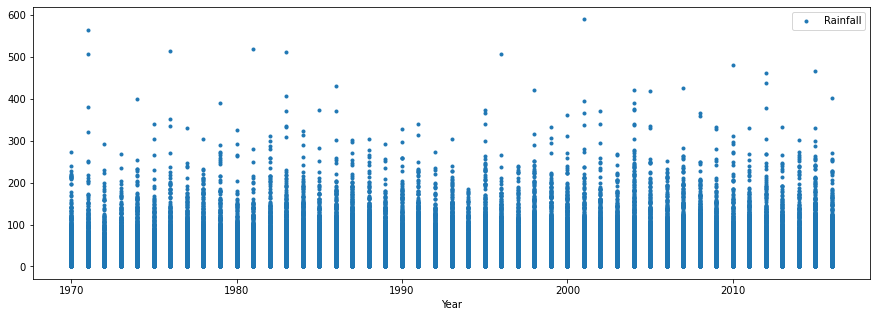

In [9]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

In [16]:
train = df.loc[df['Year'] <= 1975]
test = df.loc[df['Year'] == 2015]
train=train[train['Station']=='Dhaka']
test=test[test['Station']=='Dhaka']

In [17]:
train.size

12782

In [18]:
X_train=train.drop(['Station','StationIndex','dayofyear'],axis=1)
Y_train=train['Rainfall']

In [19]:
X_test=test.drop(['Station','StationIndex','dayofyear'],axis=1)
Y_test=test['Rainfall']

In [20]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(gamma='auto',kernel='linear')
model.fit(X_train, Y_train)

SVC(gamma='auto', kernel='linear')

In [21]:
Y_pred = model.predict(X_test)

In [22]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']!=0].head(10)

,Actual Rainfall,Predicted Rainfall
2015-01-04,1,1
2015-01-17,2,2
2015-02-15,4,4
2015-02-19,2,2
2015-02-20,11,11
2015-03-05,4,4
2015-04-02,58,52
2015-04-04,2,2
2015-04-05,30,28
2015-04-06,21,21


In [23]:
Y_test1=test['Rainfall']

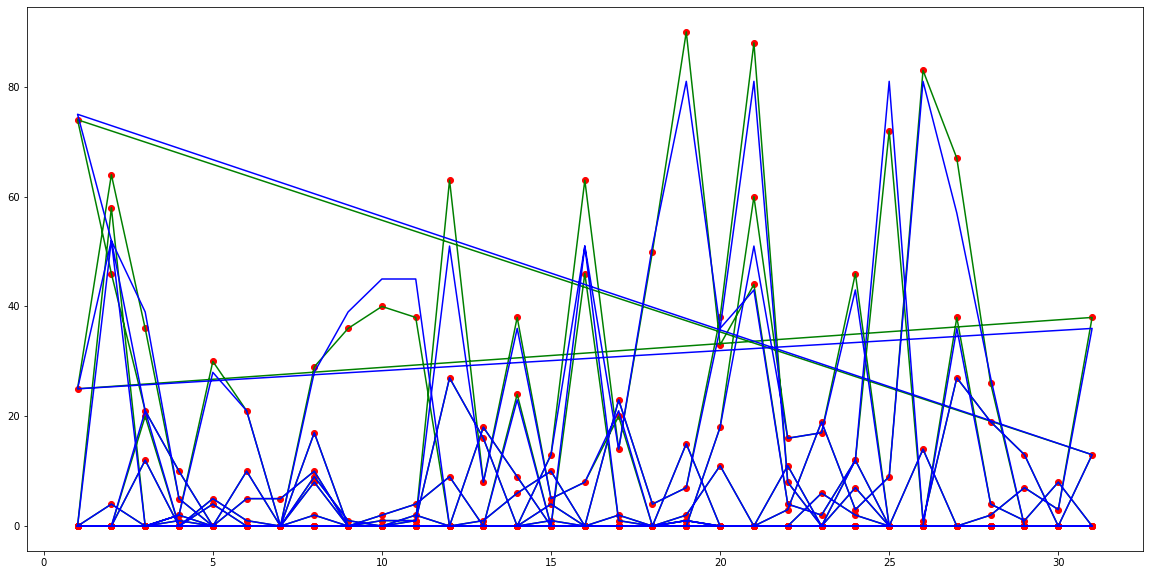

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

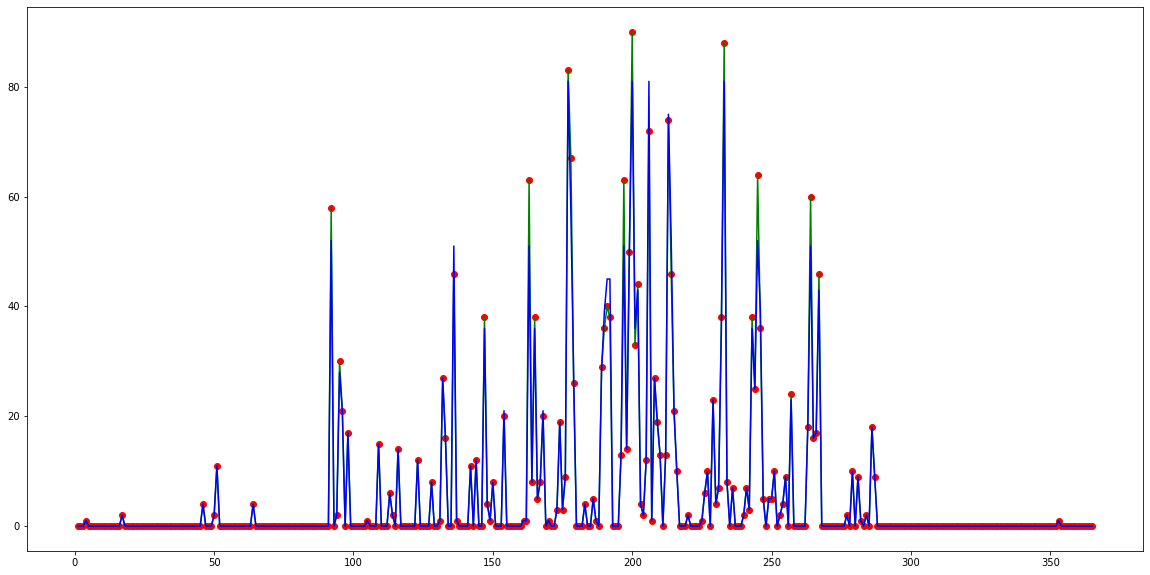

In [25]:
plt.figure(figsize=(20,10))


plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

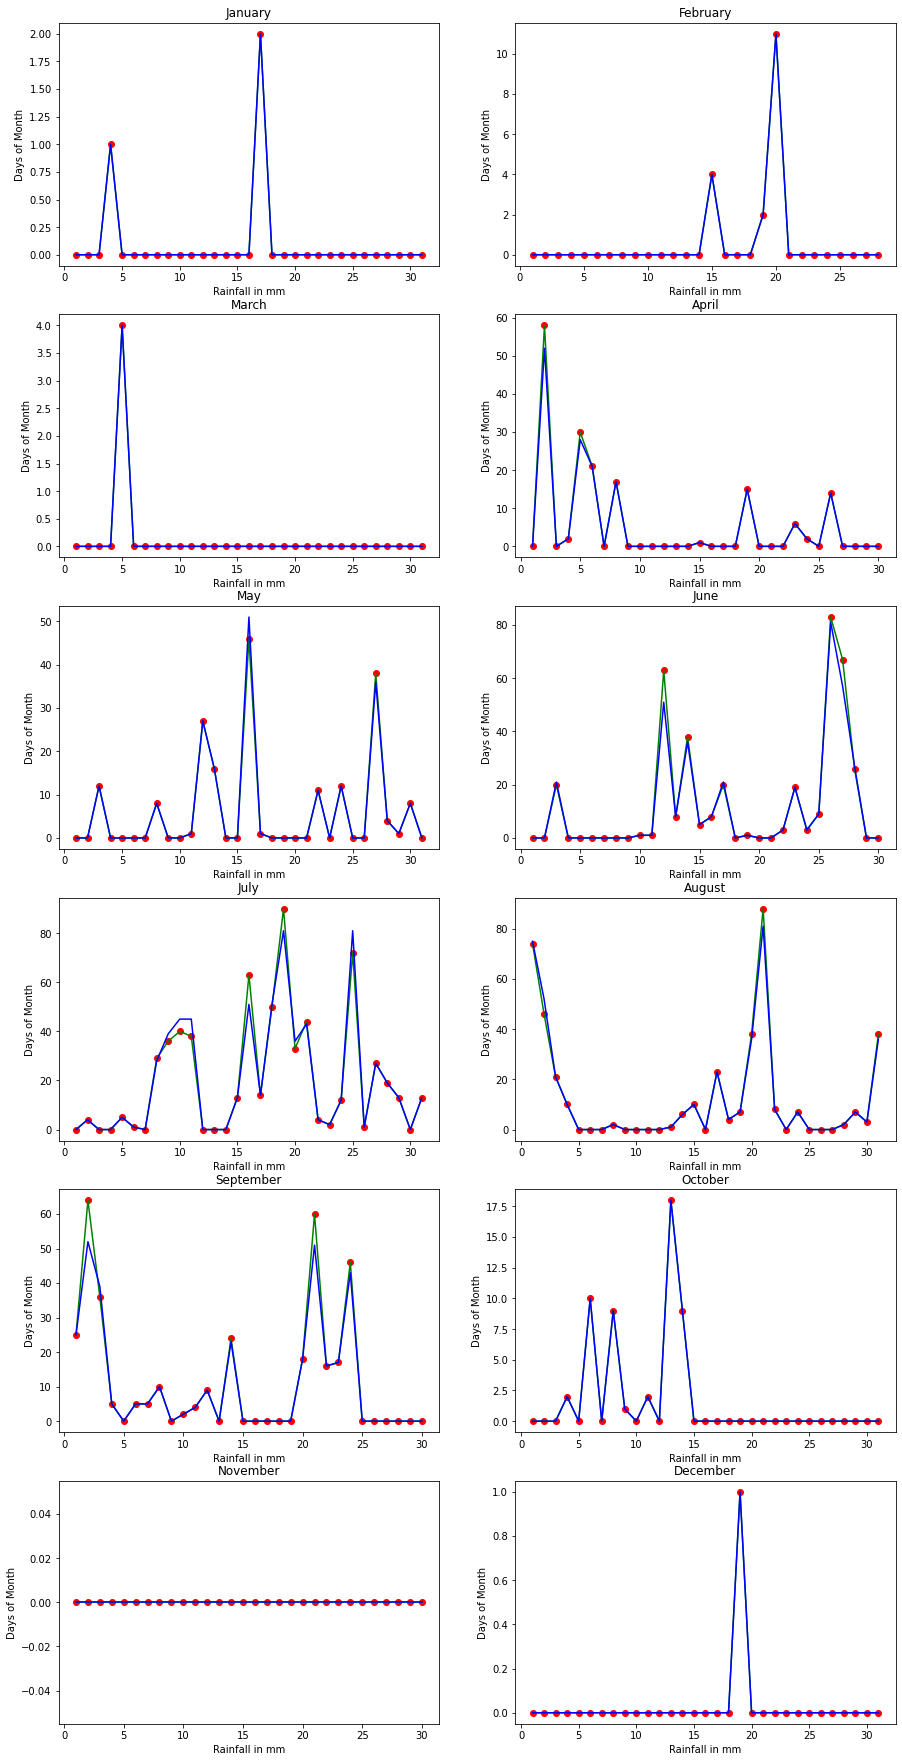

In [26]:
import datetime
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],model.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [27]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [28]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
2015-01-04,1,1.098805
2015-01-17,2,2.097990
2015-02-15,4,4.096401
2015-02-19,2,2.097989
2015-02-20,11,11.090816
2015-03-05,4,4.096418
2015-04-02,58,58.053394
2015-04-04,2,2.098015
2015-04-05,30,30.075702
2015-04-06,21,21.082872


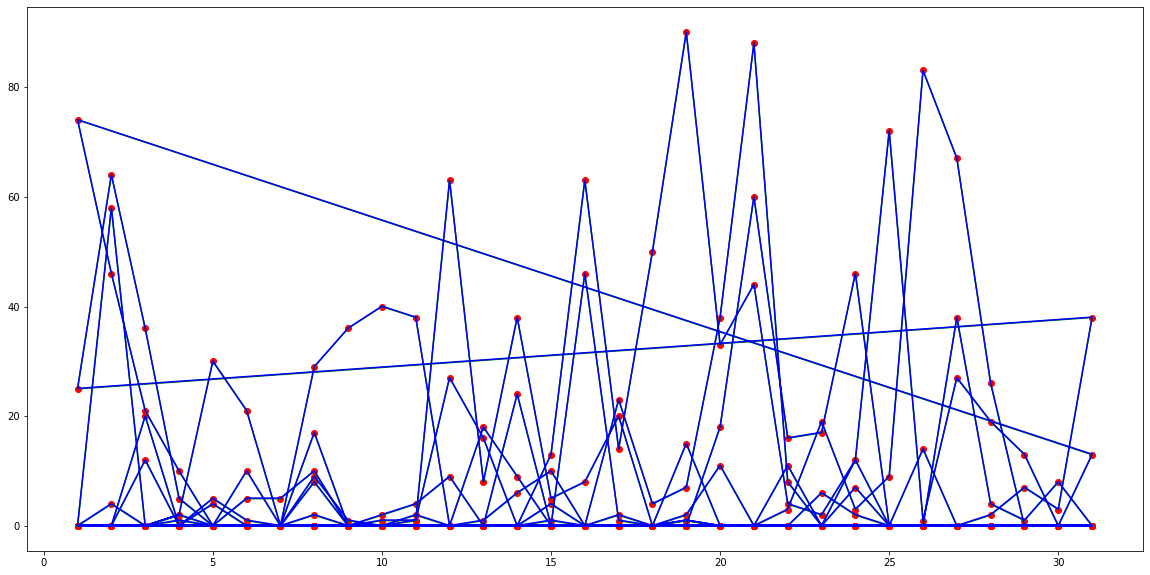

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

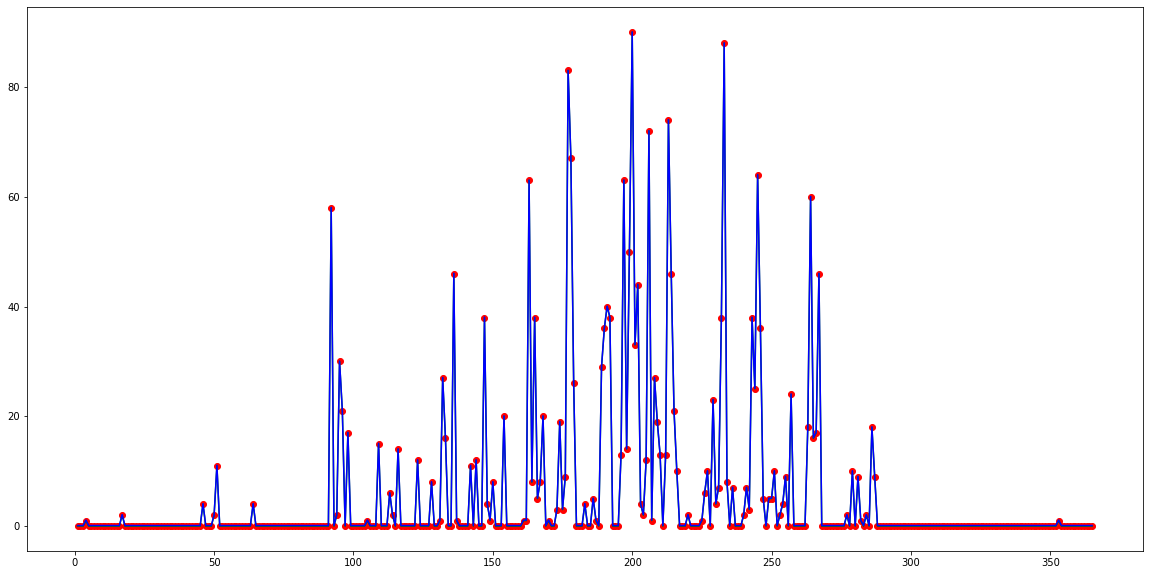

In [30]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

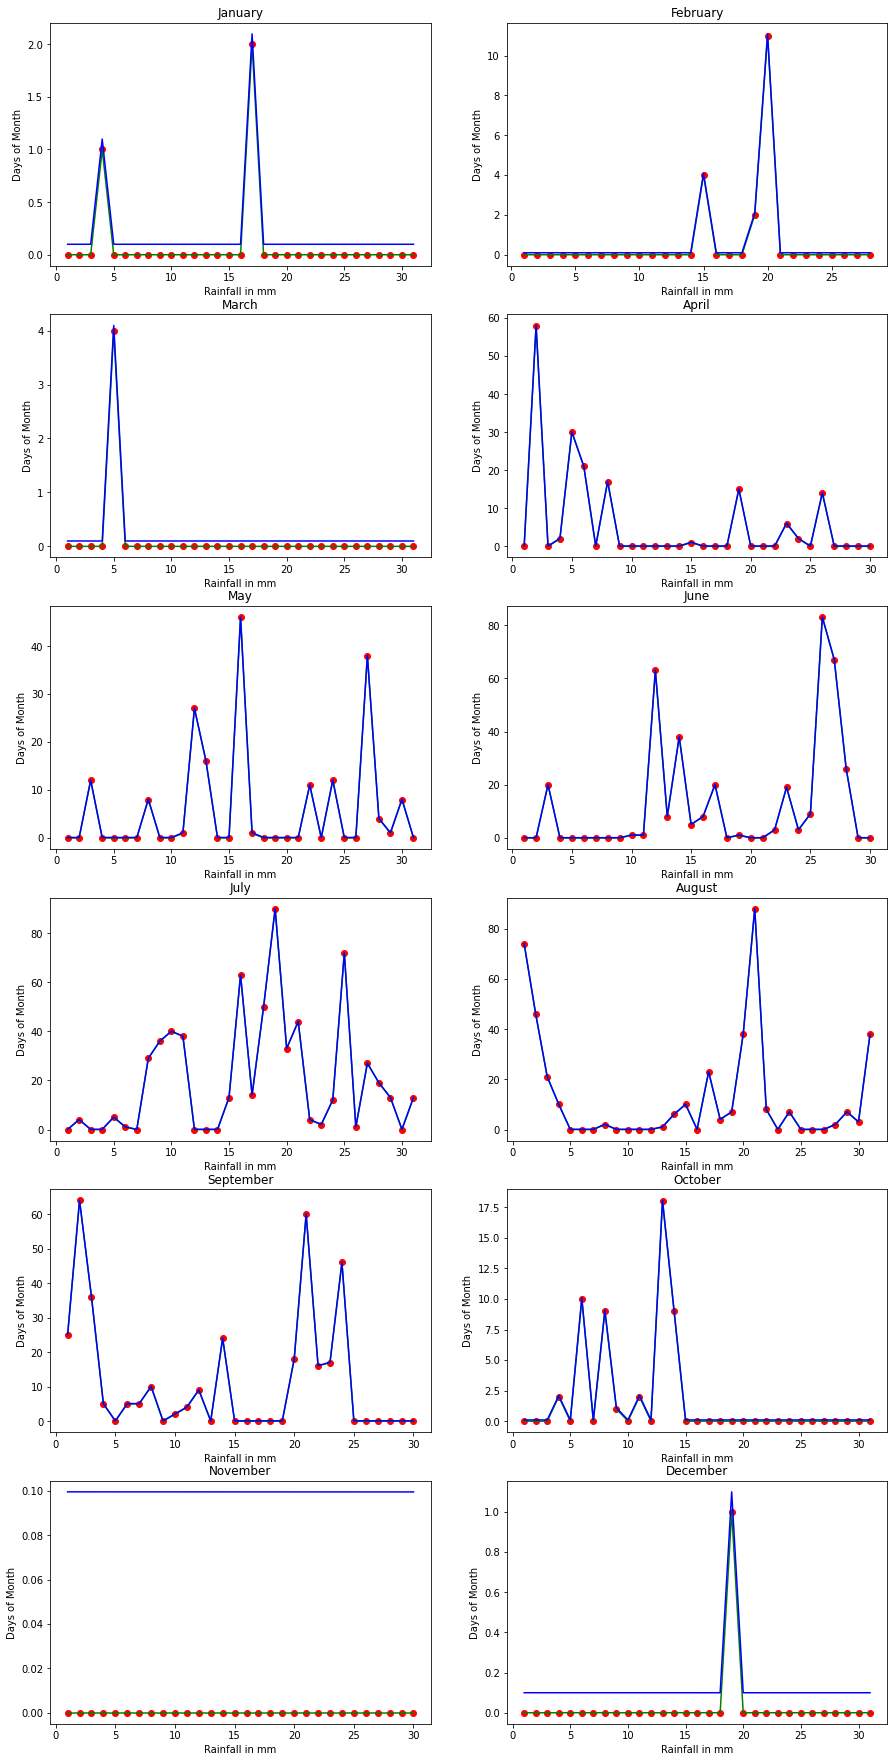

In [31]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],regressor.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
Y_pred = neig.predict(X_test)

In [34]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
2015-02-15,4,1
2015-02-20,11,10
2015-03-05,4,4
2015-04-02,58,52
2015-04-05,30,28
2015-04-06,21,15
2015-04-08,17,15
2015-04-15,1,1
2015-04-19,15,14
2015-04-23,6,5


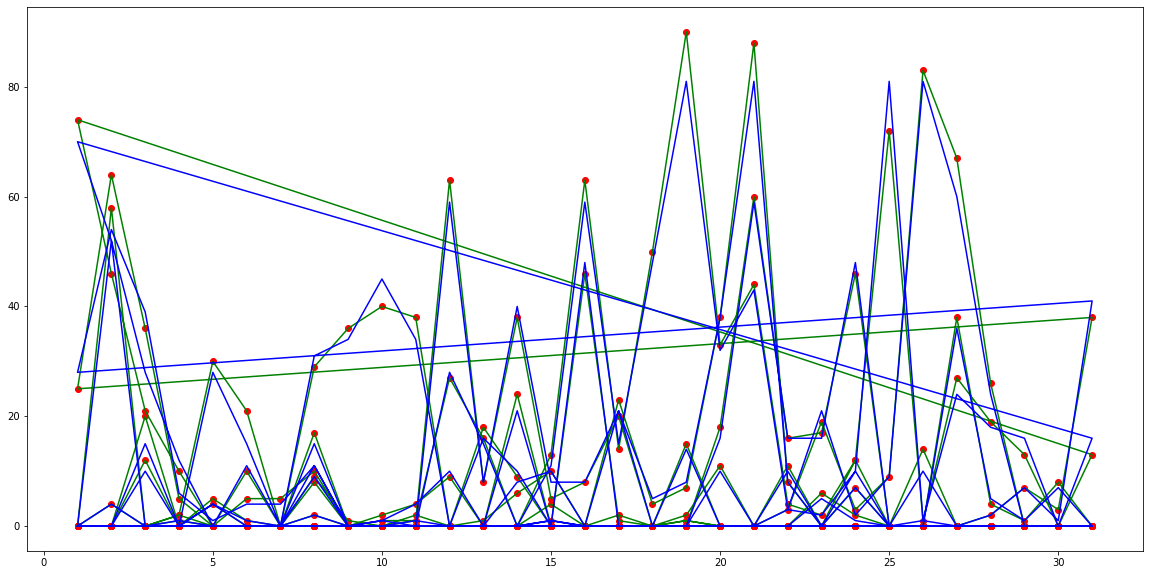

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

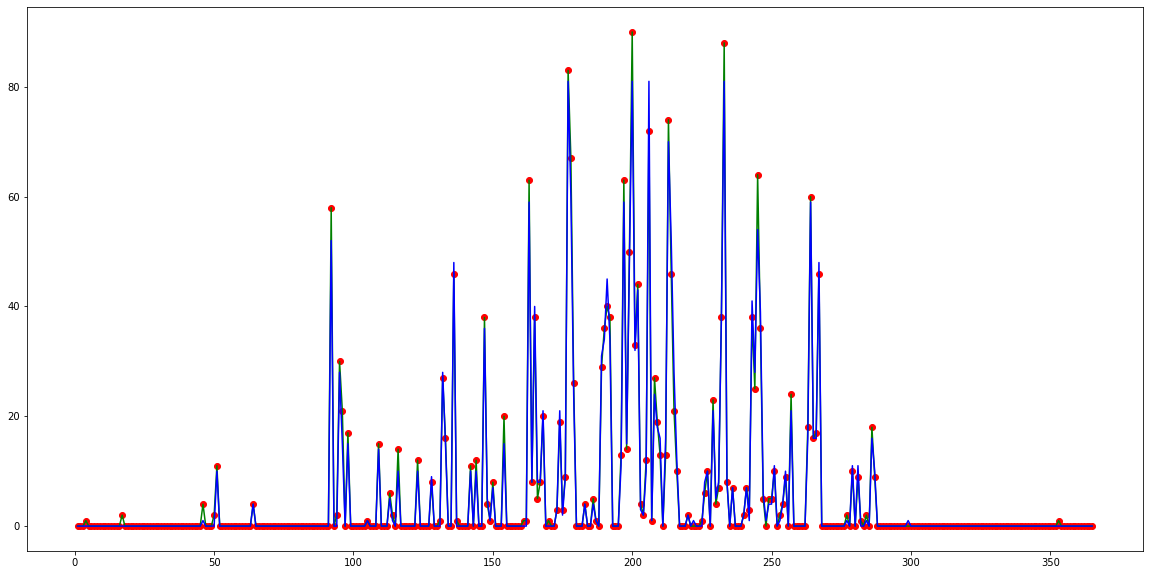

In [36]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

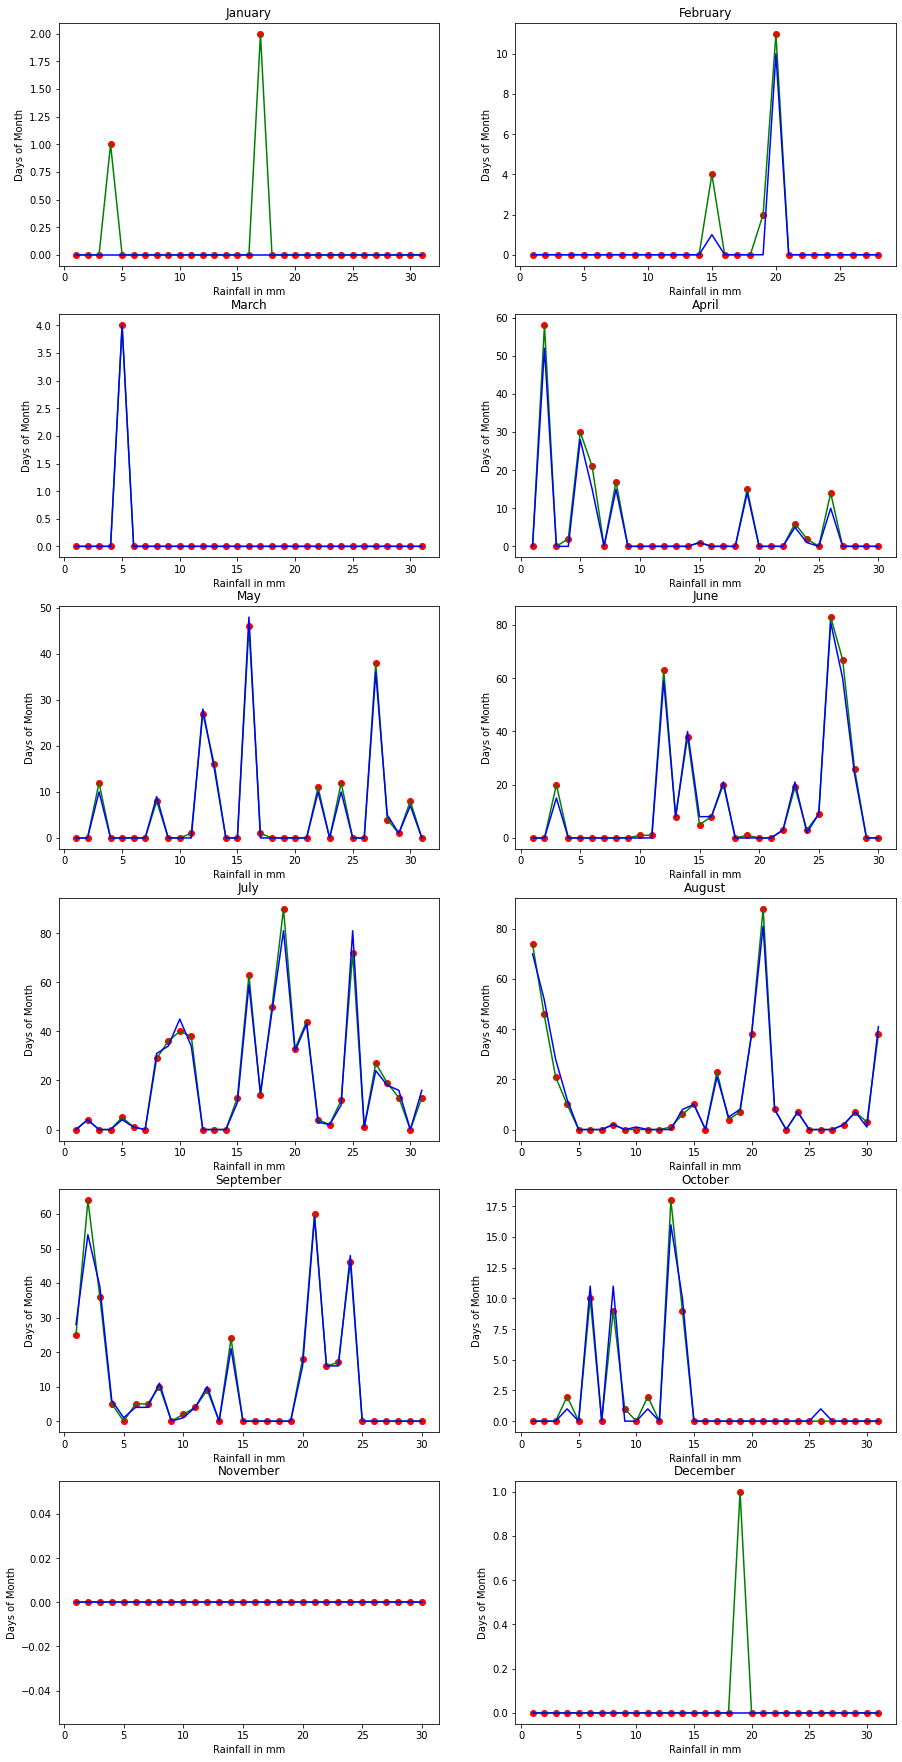

In [37]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],neig.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,Y_train)

C:\Users\MEDINA TECH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [39]:
Y_pred = mlp.predict(X_test)

In [40]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
2015-02-15,4,5
2015-02-20,11,10
2015-03-05,4,5
2015-04-02,58,70
2015-04-05,30,27
2015-04-06,21,18
2015-04-08,17,18
2015-04-19,15,18
2015-04-23,6,7
2015-04-26,14,10


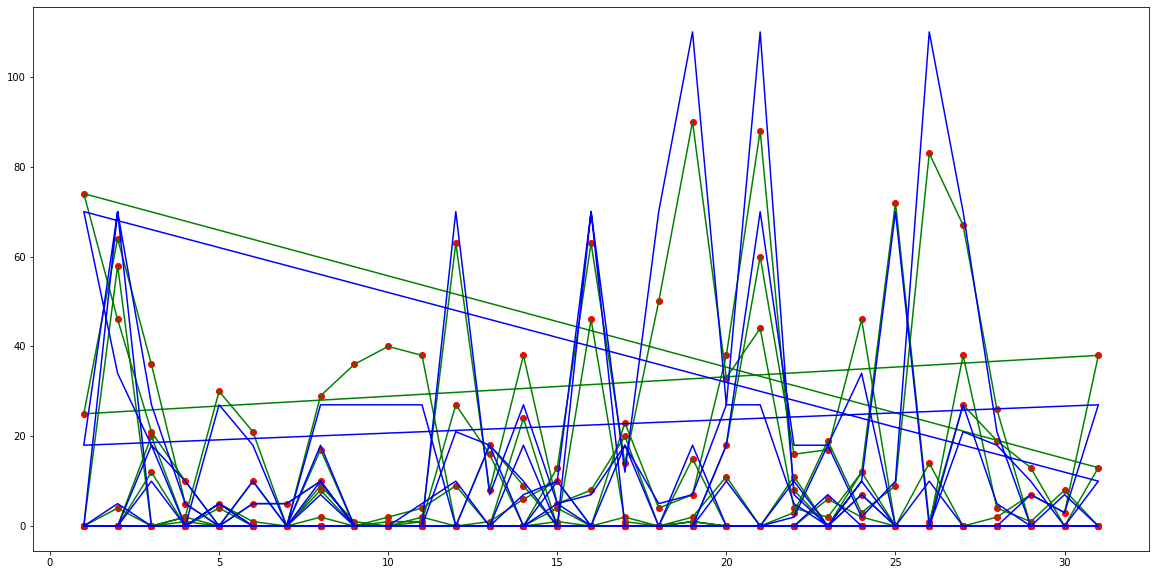

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

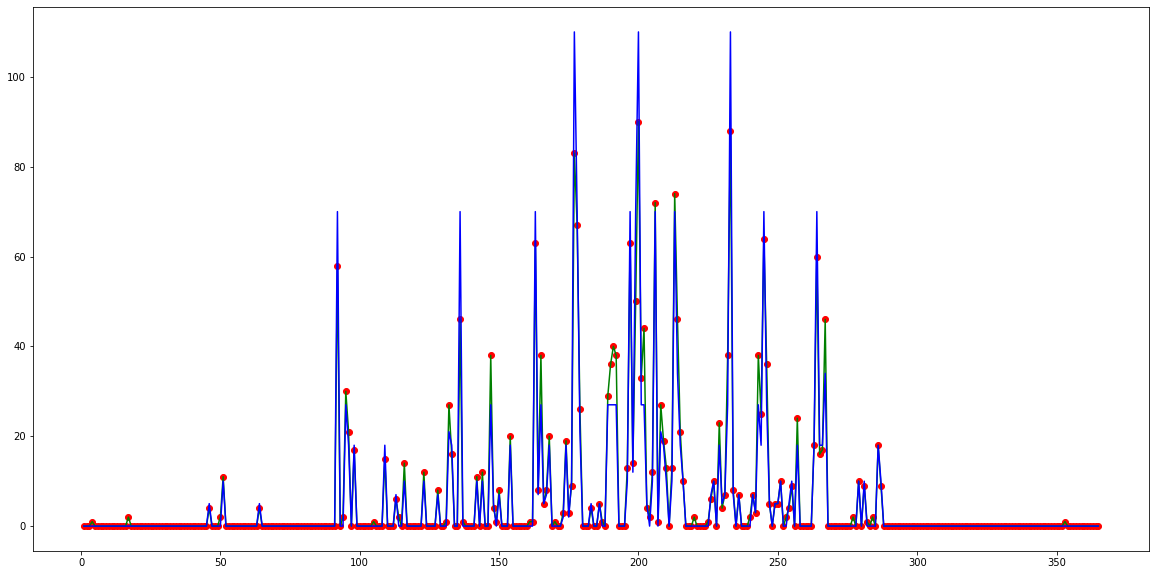

In [42]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

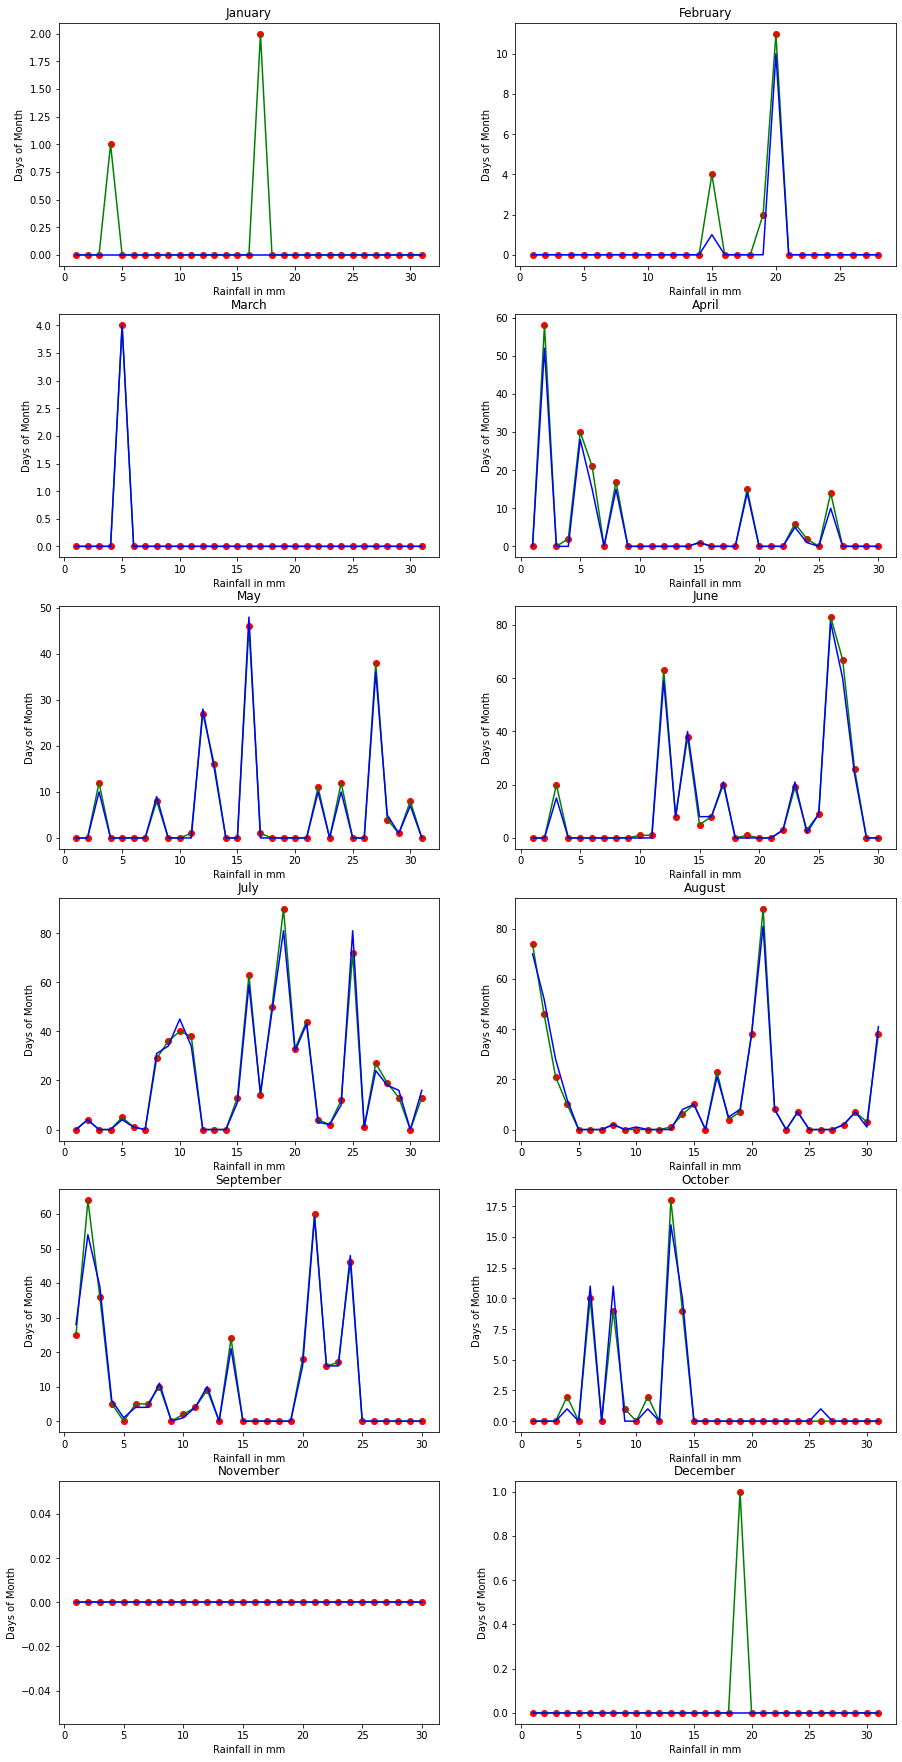

In [43]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],neig.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1